In [6]:
import pickle
import numpy as np

dataset_path_dict = {
        "embeddings": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/google_vit-base-patch16-224_embeddings_softmax.pkl",
        "neural": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy"
    }

with open(dataset_path_dict['embeddings'], "rb") as f:
            embeddings_raw = pickle.load(f)
            
embeddings=embeddings_raw['natural_scenes']

k=50
mean_probs = embeddings.mean(axis=0)
topk_idx = np.argsort(mean_probs)[-k:]
embeddings_topk = embeddings[:, topk_idx]

dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy') 

import numpy as np
import statsmodels.api as sm

# Load your data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')  # (neurons x 118)
# embeddings_topk should already be in your environment (shape: 118 x k)
assert dat.shape[1] == embeddings_topk.shape[0], "Stimulus count mismatch!"

n_trials = 50
n_neurons = dat.shape[0]

# Transpose dat to (stimuli x neurons)
dat_T = dat.T  # shape (118, n_neurons)
n_neurons=10
# Run GLM for each neuron
results = []
for i in range(n_neurons):
    y_counts = dat_T[:, i]
    y_successes = np.clip(np.round(y_counts), 0, n_trials)
    y_failures = n_trials - y_successes
    y = np.column_stack((y_successes, y_failures))  # binomial format

    X = sm.add_constant(embeddings_topk)

    try:
        model = sm.GLM(y, X, family=sm.families.Binomial())
        result = model.fit()
        results.append(result)
        print(f"Neuron {i}: Done")
    except Exception as e:
        print(f"Neuron {i}: Error - {e}")
        results.append(None)


Neuron 0: Done
Neuron 1: Done
Neuron 2: Done
Neuron 3: Done
Neuron 4: Done
Neuron 5: Done
Neuron 6: Done
Neuron 7: Done
Neuron 8: Done
Neuron 9: Done


In [7]:
import pickle

# Extract summary statistics from each result object
glm_summary_data = []

for i, res in enumerate(results):
    if res is not None:
        glm_summary_data.append({
            'neuron': i,
            'params': res.params,              # coefficients (including intercept)
            'pvalues': res.pvalues,            # p-values
            'deviance': res.deviance,
            'null_deviance': res.deviance,
            'aic': res.aic,
            'bic': res.bic,
            'converged': res.converged,
            'r2': 1 - (res.deviance / res.null_deviance)
                              # use .converged instead of .mle_retvals
        })
    else:
        glm_summary_data.append({
            'neuron': i,
            'error': True
        })

# Save to disk
with open("glm_binomial_topk_results.pkl", "wb") as f:
    pickle.dump(glm_summary_data, f)

print("✅ GLM results saved to 'glm_binomial_topk_results.pkl'")


✅ GLM results saved to 'glm_binomial_topk_results.pkl'


/home/maria/global_venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/maria/global_venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. Y

In [8]:
rng = np.random.default_rng(seed=42)
embeddings_topk_shuffled = np.array([rng.permutation(row) for row in embeddings_topk])  # shape: (118, k)

import pickle
import numpy as np

dataset_path_dict = {
        "embeddings": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/google_vit-base-patch16-224_embeddings_softmax.pkl",
        "neural": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy"
    }

with open(dataset_path_dict['embeddings'], "rb") as f:
            embeddings_raw = pickle.load(f)
            
embeddings=embeddings_raw['natural_scenes']

k=50
mean_probs = embeddings.mean(axis=0)
topk_idx = np.argsort(mean_probs)[-k:]
embeddings_topk = embeddings[:, topk_idx]
embeddings_topk=embeddings_topk_shuffled

dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy') 

import numpy as np
import statsmodels.api as sm

# Load your data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')  # (neurons x 118)
# embeddings_topk should already be in your environment (shape: 118 x k)
assert dat.shape[1] == embeddings_topk.shape[0], "Stimulus count mismatch!"

n_trials = 50
n_neurons = dat.shape[0]

# Transpose dat to (stimuli x neurons)
dat_T = dat.T  # shape (118, n_neurons)
n_neurons=10
# Run GLM for each neuron
results = []
for i in range(n_neurons):
    y_counts = dat_T[:, i]
    y_successes = np.clip(np.round(y_counts), 0, n_trials)
    y_failures = n_trials - y_successes
    y = np.column_stack((y_successes, y_failures))  # binomial format

    X = sm.add_constant(embeddings_topk)

    try:
        model = sm.GLM(y, X, family=sm.families.Binomial())
        result = model.fit()
        results.append(result)
        print(f"Neuron {i}: Done")
    except Exception as e:
        print(f"Neuron {i}: Error - {e}")
        results.append(None)

import pickle

# Extract summary statistics from each result object
glm_summary_data = []

for i, res in enumerate(results):
    if res is not None:
        glm_summary_data.append({
            'neuron': i,
            'params': res.params,              # coefficients (including intercept)
            'pvalues': res.pvalues,            # p-values
            'deviance': res.deviance,
            'null_deviance': res.deviance,
            'aic': res.aic,
            'bic': res.bic,
            'converged': res.converged,
            'r2': 1 - (res.deviance / res.null_deviance)
                              # use .converged instead of .mle_retvals
        })
    else:
        glm_summary_data.append({
            'neuron': i,
            'error': True
        })

# Save to disk
with open("glm_binomial_topk_shuffled.pkl", "wb") as f:
    pickle.dump(glm_summary_data, f)

print("✅ GLM results saved to 'glm_binomial_topk_shuffled.pkl'")

Neuron 0: Done
Neuron 1: Done
Neuron 2: Done
Neuron 3: Done
Neuron 4: Done
Neuron 5: Done
Neuron 6: Done
Neuron 7: Done
Neuron 8: Done
Neuron 9: Done
✅ GLM results saved to 'glm_binomial_topk_shuffled.pkl'


/home/maria/global_venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/home/maria/global_venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. Y

✅ Valid comparisons: 10
📊 Fraction with real > shuffled: 7/10 = 0.700
📈 Bayesian P(real > shuffled): 0.682


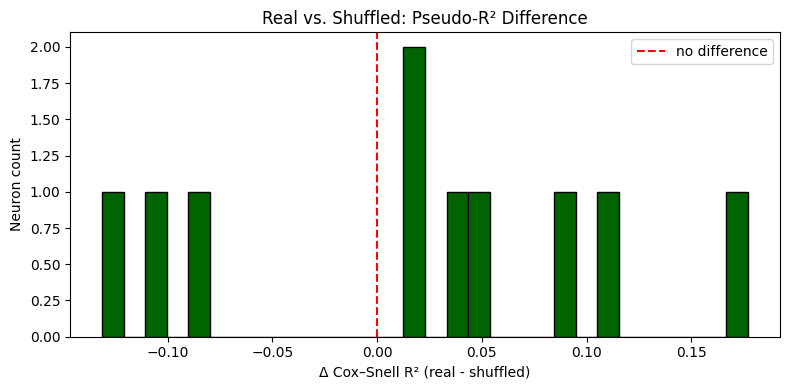

In [9]:
# --- Load the pickled GLM results ---
with open("glm_binomial_topk_results.pkl", "rb") as f:
    results_real = pickle.load(f)

with open("glm_binomial_topk_shuffled.pkl", "rb") as f:
    results_shuffled = pickle.load(f)

import pickle
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# --- Load results ---
with open("glm_binomial_topk_results.pkl", "rb") as f:
    results_real = pickle.load(f)

with open("glm_binomial_topk_shuffled.pkl", "rb") as f:
    results_shuffled = pickle.load(f)

# --- Extract r2 values ---
r2_real = np.array([d.get("r2", None) for d in results_real])
r2_shuf = np.array([d.get("r2", None) for d in results_shuffled])

# --- Filter valid (non-None, positive) entries ---
valid_mask = (~np.isnan(r2_real)) & (~np.isnan(r2_shuf)) & (r2_real > 0) & (r2_shuf > 0)
r2_real_valid = r2_real[valid_mask]
r2_shuf_valid = r2_shuf[valid_mask]

# --- Compute delta R² ---
r2_diff = r2_real_valid - r2_shuf_valid

# --- Bayesian test: P(real > shuffled) ---
k = np.sum(r2_diff > 0)
n = len(r2_diff)
posterior = beta(0.5 + k, 0.5 + (n - k))
p_real_better = posterior.mean()

# --- Print summary ---
print(f"✅ Valid comparisons: {n}")
print(f"📊 Fraction with real > shuffled: {k}/{n} = {k/n:.3f}")
print(f"📈 Bayesian P(real > shuffled): {p_real_better:.3f}")

# --- Plot the histogram of delta R² ---
plt.figure(figsize=(8, 4))
plt.hist(r2_diff, bins=30, color='darkgreen', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='no difference')
plt.xlabel("Δ Cox–Snell R² (real - shuffled)")
plt.ylabel("Neuron count")
plt.title("Real vs. Shuffled: Pseudo-R² Difference")
plt.legend()
plt.tight_layout()
plt.show()
